In this project, we are exploring the Country Data on Kaggle to cluster countries together in order to identify which countries need the most help for Health Aid Program

Link to the dataset: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?resource=download

# Import the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
country = pd.read_csv("Country-data.csv")

In [ ]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Shape of df
country.shape

(167, 10)

In [ ]:
# numbers of columns
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Null counts
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## I want to explore how many clusters of countries there are if we only use 'child_mort' and 'life_expec' columns

Data Dictionary:
* child_mort: Death of children under 5 years of age per 1000 live births

* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

## Creating a df that only contains the 2 columns mentioned above

In [ ]:
country1 = country[["child_mort", "life_expec"]]

In [ ]:
country1

,child_mort,life_expec
0,90.2,56.2
1,16.6,76.3
2,27.3,76.5
3,119.0,60.1
4,10.3,76.8
...,...,...
162,29.2,63.0
163,17.1,75.4
164,23.3,73.1
165,56.3,67.5


In [ ]:
X = country1.values

In [ ]:
X

array([[ 90.2,  56.2],
       [ 16.6,  76.3],
       [ 27.3,  76.5],
       [119. ,  60.1],
       [ 10.3,  76.8],
       [ 14.5,  75.8],
       [ 18.1,  73.3],
       [  4.8,  82. ],
       [  4.3,  80.5],
       [ 39.2,  69.1],
       [ 13.8,  73.8],
       [  8.6,  76. ],
       [ 49.4,  70.4],
       [ 14.2,  76.7],
       [  5.5,  70.4],
       [  4.5,  80. ],
       [ 18.8,  71.4],
       [111. ,  61.8],
       [ 42.7,  72.1],
       [ 46.6,  71.6],
       [  6.9,  76.8],
       [ 52.5,  57.1],
       [ 19.8,  74.2],
       [ 10.5,  77.1],
       [ 10.8,  73.9],
       [116. ,  57.9],
       [ 93.6,  57.7],
       [ 44.4,  66.1],
       [108. ,  57.3],
       [  5.6,  81.3],
       [ 26.5,  72.5],
       [149. ,  47.5],
       [150. ,  56.5],
       [  8.7,  79.1],
       [ 15.7,  74.6],
       [ 18.6,  76.4],
       [ 88.2,  65.9],
       [116. ,  57.5],
       [ 63.9,  60.4],
       [ 10.2,  80.4],
       [111. ,  56.3],
       [  5.5,  76.3],
       [  3.6,  79.9],
       [  3

## Now we prepare the dataset

In [ ]:
 # Perform standardization and PCA on the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
#scaler = MinMaxScaler()
# pca = PCA(n_components=2) # convert from a 3d to a 2d object

# scaled_data = scaler.fit_transform(X)
# pca_data = pca.fit_transform(scaled_data)

## Now we perform the Elbow Method to identify optimal number of clusters to use

In [ ]:
# Create a blank list 'wcss' which stands for within clusters sum of square. wcss values largest when K (# of clusters) = 1
wcss = []

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # inertia is a metric used to evaluate clustering performance.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS values')

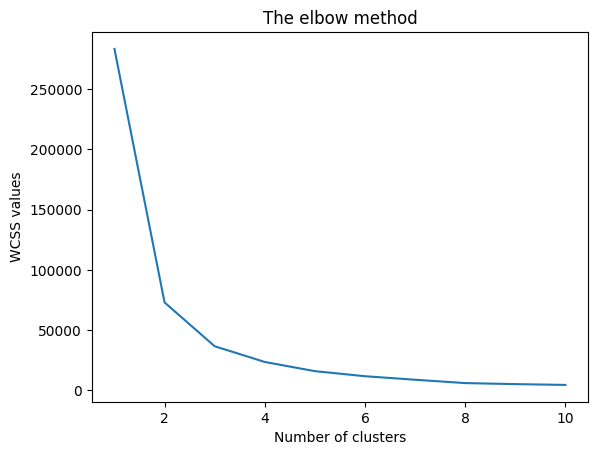

In [ ]:
# Plot elbow method
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")

We can see that after 3, the slope starts to flatten out more, which is a sign to select 3 as optimal number of clusters.

## Create a KMeans model to evaluate the clusters

In [ ]:
# Initialize the model
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [ ]:
# Predicting the data using the created model
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


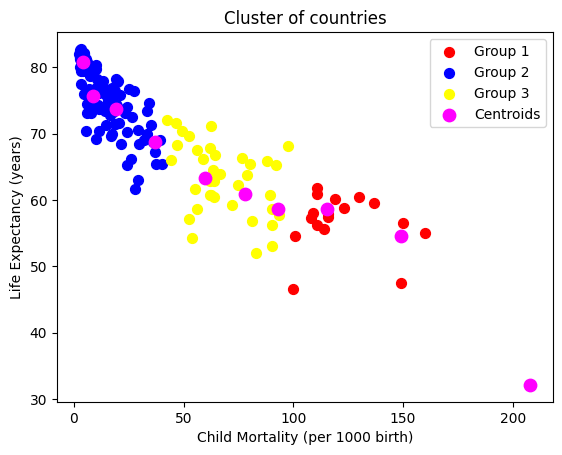

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0,1], s = 50, c = "red", label = "Group 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1,1], s = 50, c = "blue", label = "Group 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2,1], s = 50, c = "yellow", label = "Group 3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 80, c = "magenta", label = "Centroids")
plt.xlabel("Child Mortality (per 1000 birth)")
plt.ylabel("Life Expectancy (years)")
plt.title("Cluster of countries")
plt.legend()

After exploring multiple different methods of either scale or no scale, I found that no-scaling works best on this data.

Countries in red are the ones that need the most help with highest child mortality and lowest life expectancy.

## Explore what countries belong in that group

In [ ]:
# Creating a new column that contains Cluster Labels
country1["Cluster label"] = y_kmeans

<ipython-input-19-7885ae95058d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country1["Cluster label"] = y_kmeans


In [ ]:
print(country1)

     child_mort  life_expec  Cluster label
0          90.2        56.2              2
1          16.6        76.3              1
2          27.3        76.5              1
3         119.0        60.1              0
4          10.3        76.8              1
..          ...         ...            ...
162        29.2        63.0              1
163        17.1        75.4              1
164        23.3        73.1              1
165        56.3        67.5              2
166        83.1        52.0              2

[167 rows x 3 columns]


## Cluster label = 0 (group 1) are countries that we are looking after.

In [ ]:
country2 = country1[country1["Cluster label"]==0]
country2.head()

,child_mort,life_expec,Cluster label
3,119.0,60.1,0
17,111.0,61.8,0
25,116.0,57.9,0
28,108.0,57.3,0
31,149.0,47.5,0


## Find the names of countries that belong to group 1

In [ ]:
merged_df = country.merge(country2,left_index=True, right_index=True)

In [ ]:
merged_df

,country,child_mort_x,exports,health,imports,income,inflation,life_expec_x,total_fer,gdpp,child_mort_y,life_expec_y,Cluster label
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,119.0,60.1,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,111.0,61.8,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,116.0,57.9,0
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,108.0,57.3,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,149.0,47.5,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,150.0,56.5,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,116.0,57.5,0
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,111.0,56.3,0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,111.0,60.9,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,109.0,58.0,0


In [ ]:
merged_df.shape

(18, 13)

In [ ]:
# Reducing # columns for easier operations
final_df = merged_df[["child_mort_y", "life_expec_y", "Cluster label", "country"]]
final_df.sort_values(by = ["child_mort_y"], ascending = False)

,child_mort_y,life_expec_y,Cluster label,country
66,208.0,32.1,0,Haiti
132,160.0,55.0,0,Sierra Leone
32,150.0,56.5,0,Chad
31,149.0,47.5,0,Central African Republic
97,137.0,59.5,0,Mali
113,130.0,60.5,0,Nigeria
112,123.0,58.8,0,Niger
3,119.0,60.1,0,Angola
37,116.0,57.5,0,"Congo, Dem. Rep."
25,116.0,57.9,0,Burkina Faso


These 18 countries need the most help from the Health Aid Program. They experience low Life Expectancy and high child mortality.

Text(0.5, 1.0, 'Bottom 18 countries based on Child Mortility and Life Expectancy')

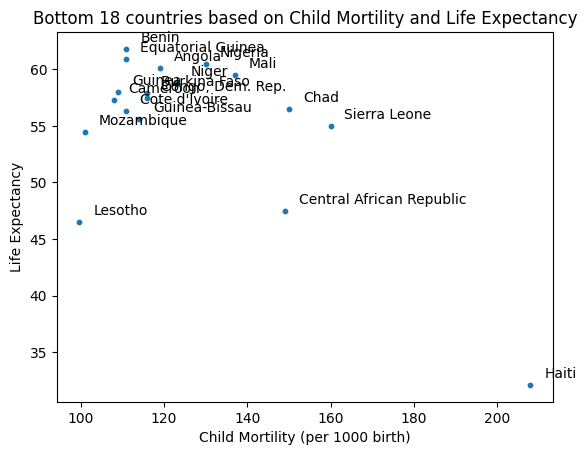

In [ ]:
plt.scatter(final_df["child_mort_y"], final_df["life_expec_y"], s = 10)
# Show label on the plot for the 18 countries
for i, country in enumerate(final_df['country']): # Get both index and values from "country" column. i contains index and country contains the value
  plt.annotate(country, (final_df['child_mort_y'].iloc[i], final_df['life_expec_y'].iloc[i]), xytext=(10, 5), textcoords='offset points', fontweight = "light")
plt.xlabel("Child Mortility (per 1000 birth)")
plt.ylabel("Life Expectancy")
plt.title("Bottom 18 countries based on Child Mortility and Life Expectancy")

## In this project, we can see that Haiti needs the most help and Central African Republic comes in second most help needed from the Health Aid Program.